In [31]:
!pip install wordcloud

In [32]:
import pandas as pd
import numpy as np
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [18]:
dialogues = pd.read_csv("dialogues_bigbangtheory.csv")

In [19]:
dialogues.head()


,episode_no,dialogue,character,season_id,ep_no,epidsode_title
0,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Scene,Series 01,Episode 01,Pilot Episode
1,Series 01 Episode 01 – Pilot Episode,So if a photon is directed through a plane wi...,Sheldon,Series 01,Episode 01,Pilot Episode
2,Series 01 Episode 01 – Pilot Episode,"Agreed, what’s your point?",Leonard,Series 01,Episode 01,Pilot Episode
3,Series 01 Episode 01 – Pilot Episode,"There’s no point, I just think it’s a good id...",Sheldon,Series 01,Episode 01,Pilot Episode
4,Series 01 Episode 01 – Pilot Episode,Excuse me?,Leonard,Series 01,Episode 01,Pilot Episode


In [20]:
sheldon_dialogues = dialogues[dialogues['character']=='Sheldon']

In [21]:
sheldon_dialogues.head()

,episode_no,dialogue,character,season_id,ep_no,epidsode_title
1,Series 01 Episode 01 – Pilot Episode,So if a photon is directed through a plane wi...,Sheldon,Series 01,Episode 01,Pilot Episode
3,Series 01 Episode 01 – Pilot Episode,"There’s no point, I just think it’s a good id...",Sheldon,Series 01,Episode 01,Pilot Episode
10,Series 01 Episode 01 – Pilot Episode,I think this is the place.,Sheldon,Series 01,Episode 01,Pilot Episode
15,Series 01 Episode 01 – Pilot Episode,"Leonard, I don’t think I can do this.",Sheldon,Series 01,Episode 01,Pilot Episode
17,Series 01 Episode 01 – Pilot Episode,No. We are committing genetic fraud. There’s ...,Sheldon,Series 01,Episode 01,Pilot Episode


In [22]:
sheldon_dialogues.shape[0]

11359

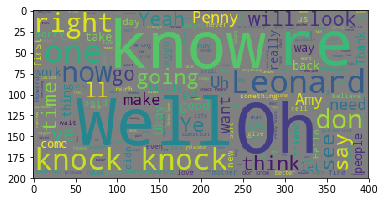

In [34]:
input_string2 = ' '.join(sheldon_dialogues['dialogue'])
wc = WordCloud(background_color = "Grey").generate(input_string2)
plt.imshow(wc)

In [35]:
docs = sheldon_dialogues['dialogue'].str.lower().str.replace('[^a-z ]', '')
docs.head()

1      so if a photon is directed through a plane wi...
3      theres no point i just think its a good idea ...
10                            i think this is the place
15                   leonard i dont think i can do this
17     no we are committing genetic fraud theres no ...
Name: dialogue, dtype: object

In [38]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords[:5]

['i', 'me', 'my', 'myself', 'we']

In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [39]:
stemmer = nltk.stem.PorterStemmer()

In [40]:
docs=sheldon_dialogues['dialogue'].str.lower().str.replace('[^a-z ]','')
docs_clean2=[]
def clean_sentence(text):
    words=text.split(' ')
    words_clean2 = [stemmer.stem(word) for word in words if word not in stopwords]
    return ' '.join(words_clean2)
docs_clean2 = docs.apply(clean_sentence)
docs_clean2.head()

1      photon direct plane two slit either slit obse...
3                  there point think good idea teeshirt
10                                          think place
15                                   leonard dont think
17     commit genet fraud there guarante sperm go ge...
Name: dialogue, dtype: object

In [41]:
docs_clean2.iloc[1]

' there point think good idea teeshirt'

In [42]:
docs_clean2.iloc[3]

' leonard dont think'

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(10)
vectorizer.fit(docs_clean2)
dtm = vectorizer.transform(docs_clean2)
dtm

<11359x10138 sparse matrix of type '<class 'numpy.int64'>'
	with 84319 stored elements in Compressed Sparse Row format>

In [44]:
no_of_zeros = (11359*10138 ) - 84319 
sparsity = (no_of_zeros) / (11359*10138 ) * 100
sparsity

99.9267794375118

In [45]:
df_dtm = pd.DataFrame(dtm.toarray(),
                     columns = vectorizer.get_feature_names())
(df_dtm == 0).sum().sum()

115073223

In [46]:
(5053 * 6145) - 31013412

37273

In [49]:
from nltk.sentiment import SentimentIntensityAnalyzer
def get_sentiment_sheldon(text):
    sentiment = SentimentIntensityAnalyzer()
    compound = sentiment.polarity_scores(text)['compound']
    if compound > 0.05:
        return 'Positive'
    elif compound < -0.05:
        return 'Negative'
    else:
        return 'Neutral'
sheldon_dialogues['sentiment_vader'] = sheldon_dialogues['dialogue'].apply(get_sentiment_sheldon)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [48]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...


True

In [50]:
sheldon_dialogues['sentiment_vader'].value_counts()

Positive    4879
Neutral     4009
Negative    2471
Name: sentiment_vader, dtype: int64

In [53]:
sheldon_dialogues.columns

Index(['episode_no', 'dialogue', 'character', 'season_id', 'ep_no',
       'epidsode_title', 'sentiment_vader'],
      dtype='object')

In [54]:
sheldon_dialogues.head()

,episode_no,dialogue,character,season_id,ep_no,epidsode_title,sentiment_vader
1,Series 01 Episode 01 – Pilot Episode,So if a photon is directed through a plane wi...,Sheldon,Series 01,Episode 01,Pilot Episode,Neutral
3,Series 01 Episode 01 – Pilot Episode,"There’s no point, I just think it’s a good id...",Sheldon,Series 01,Episode 01,Pilot Episode,Positive
10,Series 01 Episode 01 – Pilot Episode,I think this is the place.,Sheldon,Series 01,Episode 01,Pilot Episode,Neutral
15,Series 01 Episode 01 – Pilot Episode,"Leonard, I don’t think I can do this.",Sheldon,Series 01,Episode 01,Pilot Episode,Neutral
17,Series 01 Episode 01 – Pilot Episode,No. We are committing genetic fraud. There’s ...,Sheldon,Series 01,Episode 01,Pilot Episode,Negative


In [55]:
df_plot=sheldon_dialogues[['season_id', 'sentiment_vader','dialogue']].groupby(['season_id', 'sentiment_vader']).count()

In [56]:
df_plot = df_plot.reset_index()

In [58]:
df_plot.head()

,season_id,sentiment_vader,dialogue
0,Series 01,Negative,247
1,Series 01,Neutral,447
2,Series 01,Positive,401
3,Series 02,Negative,290
4,Series 02,Neutral,515


In [60]:
!pip install seaborn

In [63]:
import seaborn as sns

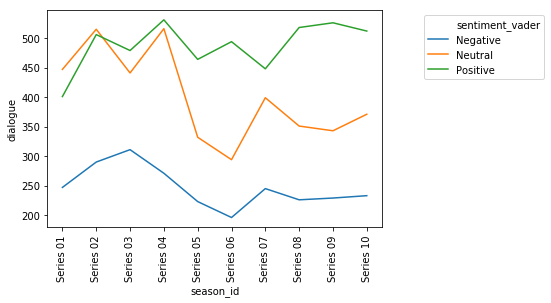

In [64]:
sns.lineplot(x='season_id',y='dialogue',hue='sentiment_vader',data=df_plot)
plt.xticks(rotation='vertical')
plt.legend(bbox_to_anchor=(1.5, 1))

In [71]:
df_plot1=sheldon_dialogues.groupby(['episode_no', 'sentiment_vader']).count()
df_plot1 = df_plot1.reset_index()

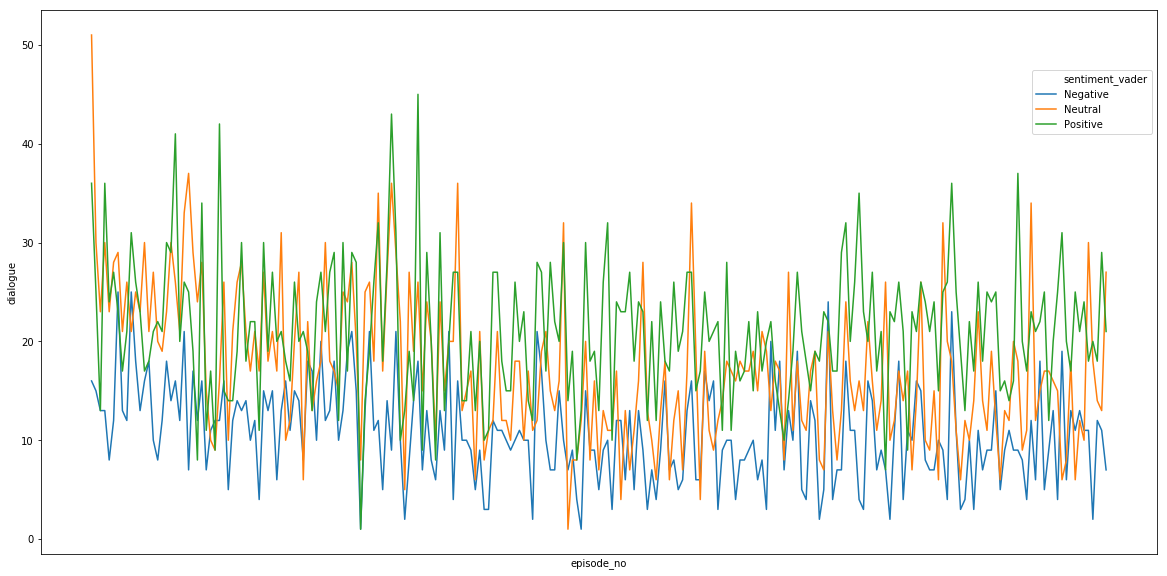

In [74]:
fig = plt.figure(figsize=(20,10))
sns.lineplot(x='episode_no',y='dialogue',hue='sentiment_vader',data=df_plot1)
plt.xticks([])
#plt.locator_params(numticks=15)
plt.legend(bbox_to_anchor=(1.0, 0.9))

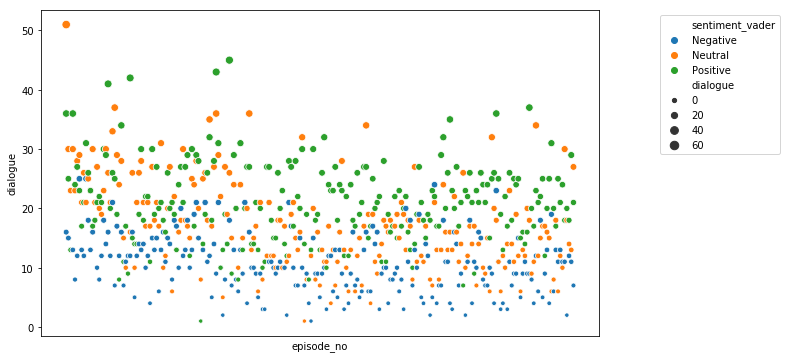

In [84]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='episode_no',y='dialogue',size='dialogue',hue='sentiment_vader',data=df_plot1)
plt.xticks([])
plt.legend(bbox_to_anchor=(1.1, 1))